<a href="https://colab.research.google.com/github/parwinderau/machinelearning/blob/main/DroneAsnmntv0.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
with open("./sample_data/Drone_Data_clnd.csv", 'r',encoding = "utf-8") as file:
    for i in range(0,4):
        print(file.readline())

﻿Model,L,W,H,Propellers total,Vertical stabilizer Winglets,Max speed,,,,,,,,,,,,,,,,,,,,,

Aerob 4D,1450,3600,440,1,2,41.67,,,,,,,,,,,,,,,,,,,,,

AeroVironment Wasp III,380,720,150,1,1,18.06,,,,,,,,,,,,,,,,,,,,,

Apex,1850,4300,500,1,2,27.78,,,,,,,,,,,,,,,,,,,,,



In [5]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model

print("If there are no errors, modules are load!")

If there are no errors, modules are load!


In [40]:
import pandas as pd

# Here we upload the data from csv files using pandas
# the comma separates the coulms and we see the countries in each line.
dataFrame = pd.read_csv("./sample_data/Drone_Data_clnd.csv", delimiter=',', encoding='utf-8') 

#print(drdata.head())

In [43]:
# Now we want to separate those from the dataset
from sklearn import preprocessing
df_l_w_h = dataFrame[["L", "W","H"]]
#print(drdata_l_w_h.head())
#df_l_w_h.isnull()


In [45]:
# Now we need to order the data according to the growing score
df_sorted = df_l_w_h.sort_values(by=["H"],ascending=True)
#https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

df_sorted.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
#Tell you rows and columns in oyur data
df_sorted.shape

#print(drdata_sorted.head(38))

(38, 3)

In [54]:
#correlation between paramters
print(df_sorted.corr())

          L         W         H
L  1.000000  0.958773  0.920486
W  0.958773  1.000000  0.907141
H  0.920486  0.907141  1.000000


In [55]:
d = preprocessing.normalize(df_sorted)
df_normalized = pd.DataFrame(d, columns=["L", "W","H"])
df_normalized.head()

,L,W,H
0,0.784715,0.619512,0.020650
1,0.775786,0.630973,0.005344
2,0.291827,0.953300,0.077820
3,0.488410,0.868284,0.086828
4,0.459032,0.869745,0.181197


In [56]:
print(df_normalized.head(38))

           L         W         H
0   0.784715  0.619512  0.020650
1   0.775786  0.630973  0.005344
2   0.291827  0.953300  0.077820
3   0.488410  0.868284  0.086828
4   0.459032  0.869745  0.181197
5   0.325684  0.930524  0.167494
6   0.364344  0.923872  0.117110
7   0.365148  0.912871  0.182574
8   0.328889  0.939682  0.093968
9   0.341882  0.911685  0.227921
10  0.502995  0.855092  0.125749
11  0.334242  0.935879  0.111414
12  0.353679  0.922640  0.153773
13  0.201180  0.977959  0.055883
14  0.512316  0.819705  0.256158
15  0.475075  0.862174  0.175954
16  0.519896  0.819836  0.239952
17  0.339961  0.934893  0.101988
18  0.357546  0.922700  0.144172
19  0.370284  0.925710  0.077142
20  0.359447  0.924293  0.128374
21  0.311583  0.942489  0.120956
22  0.370524  0.905726  0.205847
23  0.287977  0.940724  0.179186
24  0.382404  0.917770  0.107073
25  0.287295  0.938498  0.191530
26  0.617213  0.771517  0.154303
27  0.459504  0.880716  0.114876
28  0.288775  0.946805  0.142021
29  0.3959

In [51]:
#https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/
'''
df_sorted.drop(
    
    labels=[31,5,14],
    axis=0,
    inplace=True
)
'''

'\ndf_sorted.drop(\n    \n    labels=[31,5,14],\n    axis=0,\n    inplace=True\n)\n'

          L         W         H
L  1.000000 -0.973282  0.039853
W -0.973282  1.000000 -0.102884
H  0.039853 -0.102884  1.000000


In [57]:
print(df_normalized.describe())

               L          W          H
count  38.000000  38.000000  38.000000
mean    0.422766   0.877919   0.143481
std     0.135911   0.089672   0.065091
min     0.201180   0.619512   0.005344
25%     0.340441   0.863701   0.108158
50%     0.370404   0.915583   0.143096
75%     0.485076   0.929321   0.175125
max     0.784715   0.977959   0.362161


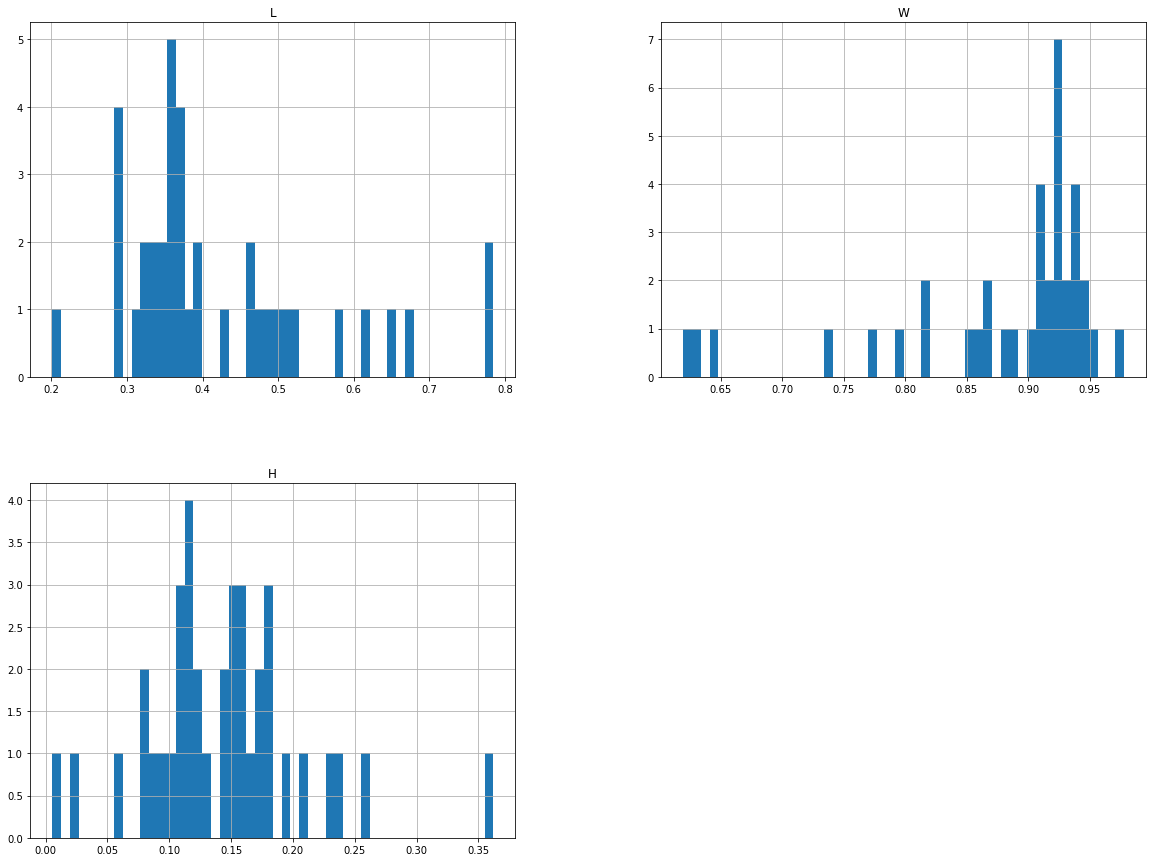

In [59]:
#Multiple linear Regressor
#https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/

%matplotlib inline
import matplotlib.pyplot as plt
df_normalized.hist(bins=50, figsize=(20,15))
#save_fig('histograms')
plt.show()

In [86]:
np.random.seed(42)
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_normalized, test_size=0.1, random_state=42)
test_set.head()

,L,W,H
33,0.371233,0.921681,0.112650
36,0.655380,0.735305,0.172637
4,0.459032,0.869745,0.181197
13,0.201180,0.977959,0.055883


In [88]:
train_set.head(11)

,L,W,H
30,0.348466,0.923644,0.159539
26,0.617213,0.771517,0.154303
6,0.364344,0.923872,0.117110
27,0.459504,0.880716,0.114876
24,0.382404,0.917770,0.107073
15,0.475075,0.862174,0.175954
17,0.339961,0.934893,0.101988
8,0.328889,0.939682,0.093968
16,0.519896,0.819836,0.239952
12,0.353679,0.922640,0.153773


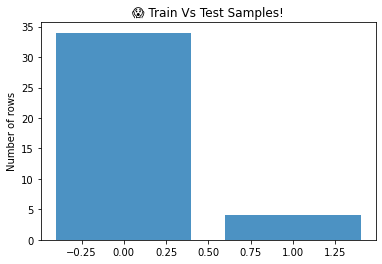

In [91]:
d_names = (train_set, test_set)
#print (d_names)
y_pos = range(len(d_names))
plt.bar(
    y_pos, 
    (train_set.shape[0], test_set.shape[0]), 
    align='center', 
    alpha=0.8
)
#plt.xticks(y_pos, d_names)
plt.ylabel('Number of rows') 
plt.title('😱 Train Vs Test Samples!')
plt.show()

In [92]:
df_lw = train_set.drop("H", axis=1) # drop labels for training set
df_h_label = train_set["H"].copy()

In [93]:
df_lw.head()

,L,W
30,0.348466,0.923644
26,0.617213,0.771517
6,0.364344,0.923872
27,0.459504,0.880716
24,0.382404,0.917770


In [94]:
df_h_label.head()

30    0.159539
26    0.154303
6     0.117110
27    0.114876
24    0.107073
Name: H, dtype: float64

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
from sklearn.compose import ColumnTransformer

In [96]:
num_attribs = list(df_lw)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

df_prepared = full_pipeline.fit_transform(df_lw)
#label_prepared = full_pipeline.transform(df_h_label) 
df_prepared

array([[-0.57166497,  0.51542328],
       [ 1.4926111 , -1.20711228],
       [-0.44970534,  0.51799599],
       [ 0.28122795,  0.02934111],
       [-0.31098052,  0.44891077],
       [ 0.40083498, -0.1806061 ],
       [-0.63699093,  0.64279018],
       [-0.72203901,  0.69701596],
       [ 0.74510694, -0.65999474],
       [-0.53162398,  0.50405348],
       [-0.40407791,  0.53881077],
       [-0.62223821,  0.38000295],
       [ 0.02573617,  0.14841766],
       [ 2.7792102 , -2.92825439],
       [-1.04152283,  0.68360507],
       [-0.74665782,  0.5933262 ],
       [-0.68091673,  0.65395152],
       [ 2.71062587, -2.79848419],
       [ 1.2361084 , -0.92856078],
       [-0.85496822,  0.72880205],
       [-1.00671664,  0.85121436],
       [-0.2072895 ,  0.36748098],
       [ 1.92896682, -2.65276479],
       [ 0.50325708, -0.11142225],
       [-0.22980369,  0.39938036],
       [-1.03628737,  0.70881643],
       [-0.48723008,  0.46900296],
       [ 0.61529197, -0.26078989],
       [-0.4022331 ,

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

#reg = RandomForestRegressor(n_estimators=10, random_state=42)
#reg = SVR(kernel="linear")
reg = LinearRegression()

reg.fit(df_prepared, df_h_label)

LinearRegression()

In [106]:
some_data = df_lw.iloc[:14]
some_labels = df_h_label.iloc[:4]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", reg.predict(some_data_prepared))

Predictions: [0.15214752 0.10948035 0.13694778 0.10710367 0.12840896 0.11801507
 0.14464484 0.14843718 0.13424321 0.14864146 0.12884895 0.17477615
 0.12382117 0.16157177]


In [107]:
reg.score(df_prepared,df_h_label)

0.1758169635943272

In [81]:
print("Labels:", list(some_labels))

Labels: [0.10707319971995141, 0.1759538357694467]


In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

df_predictions = reg.predict(df_prepared)
mse = mean_squared_error(df_h_label, df_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(df_h_label, df_predictions)
#print('My name is', os.getlogin(), 'and I am', 42)
print ('RMSE:', rmse, 'and MAE:', mae) 

RMSE: 0.06252655916268611 and MAE: 0.04633561871763649
